# PISA 2012 Exploration 
## by Maryna Misyura

## Preliminary Wrangling

> This document explores a dataset containing PISA 2012 survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a conventional school test.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.<br>
Dataset is too big. I'll have to filter data and choose only some columns to analize.<br>
First choice for filter column is county

In [58]:
# load in the dataset into a pandas dataframe, print statistics
pisa = pd.read_csv(r'C:\Users\Marin\UGitCourse\csv\pisa2012.csv', encoding = "latin-1",# index_col=0,
                    usecols=['CNT','PV1MATH','PV1READ', 'PV1SCIE','ST04Q01','ST01Q01','SCHOOLID','IMMIG','LANGN', 'ESCS','ST29Q04','ST57Q01'])
#There are 635 columns in the dataset. I'll have to choose just some of them for the analysis

In [80]:
#rename some columns 
pisa = pisa.rename(columns={'CNT': 'Country', 
                            'PV1MATH': 'Math_score', 
                            'PV1READ': 'Reading_score', 
                            'PV1SCIE': 'Science_score', 
                            'ST04Q01': 'Gender', 
                            'ST01Q01': 'Grade', 
                            'SCHOOLID': 'School_ID',
                            'IMMIG': 'Immigration_status',
                            'LANGN': 'Language_at_home',
                            'ESCS' : 'Socio_economic_status',
                            'ST29Q04': 'Enjoy_math',
                            'ST57Q01':'Homework_hours'})

In [40]:
#Temp
pisa0 = pd.read_csv(r'C:\Users\Marin\UGitCourse\csv\pisa2012.csv', encoding = "ISO-8859-1", index_col=0,)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
print(pisa.shape)
print(pisa.dtypes)
print(pisa.sample(10))

(485490, 12)
Country                   object
School_ID                  int64
Grade                      int64
Gender                    object
Enjoy_math                object
Homework_hours           float64
Socio_economic_status    float64
Immigration_status        object
Language_at_home          object
Math_score               float64
Reading_score            float64
Science_score            float64
dtype: object
                Country  School_ID  Grade  Gender         Enjoy_math  \
78369            Canada        155     10  Female           Disagree   
213120          Croatia         51      9    Male           Disagree   
241393            Italy         31      9    Male              Agree   
339793           Mexico       1040      9    Male              Agree   
255639            Italy        570     10  Female              Agree   
436141  Slovak Republic        157     10    Male  Strongly disagree   
413944          Romania         49      8  Female  Strongly disagree   
3

In [61]:
print(pisa.Country.unique().shape[0])
pisa.Country.unique()

68


array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [85]:
print(pisa.describe())
#Very strange: max Grade=96 !?

           School_ID          Grade  Homework_hours  Socio_economic_status  \
count  485490.000000  485490.000000   301367.000000          473648.000000   
mean      240.152197       9.813323        5.493770              -0.265546   
std       278.563016       3.734726        5.383815               1.131791   
min         1.000000       7.000000        0.000000              -5.950000   
25%        61.000000       9.000000        2.000000              -1.000000   
50%       136.000000      10.000000        4.000000              -0.190000   
75%       291.000000      10.000000        7.000000               0.610000   
max      1471.000000      96.000000       30.000000               3.690000   

          Math_score  Reading_score  Science_score  
count  485490.000000  485490.000000  485490.000000  
mean      469.621653     472.004640     475.769824  
std       103.265391     102.505523     101.464426  
min        19.792800       0.083400       2.648300  
25%       395.318600     403.600

In [4]:
base_color = sb.color_palette()[0]

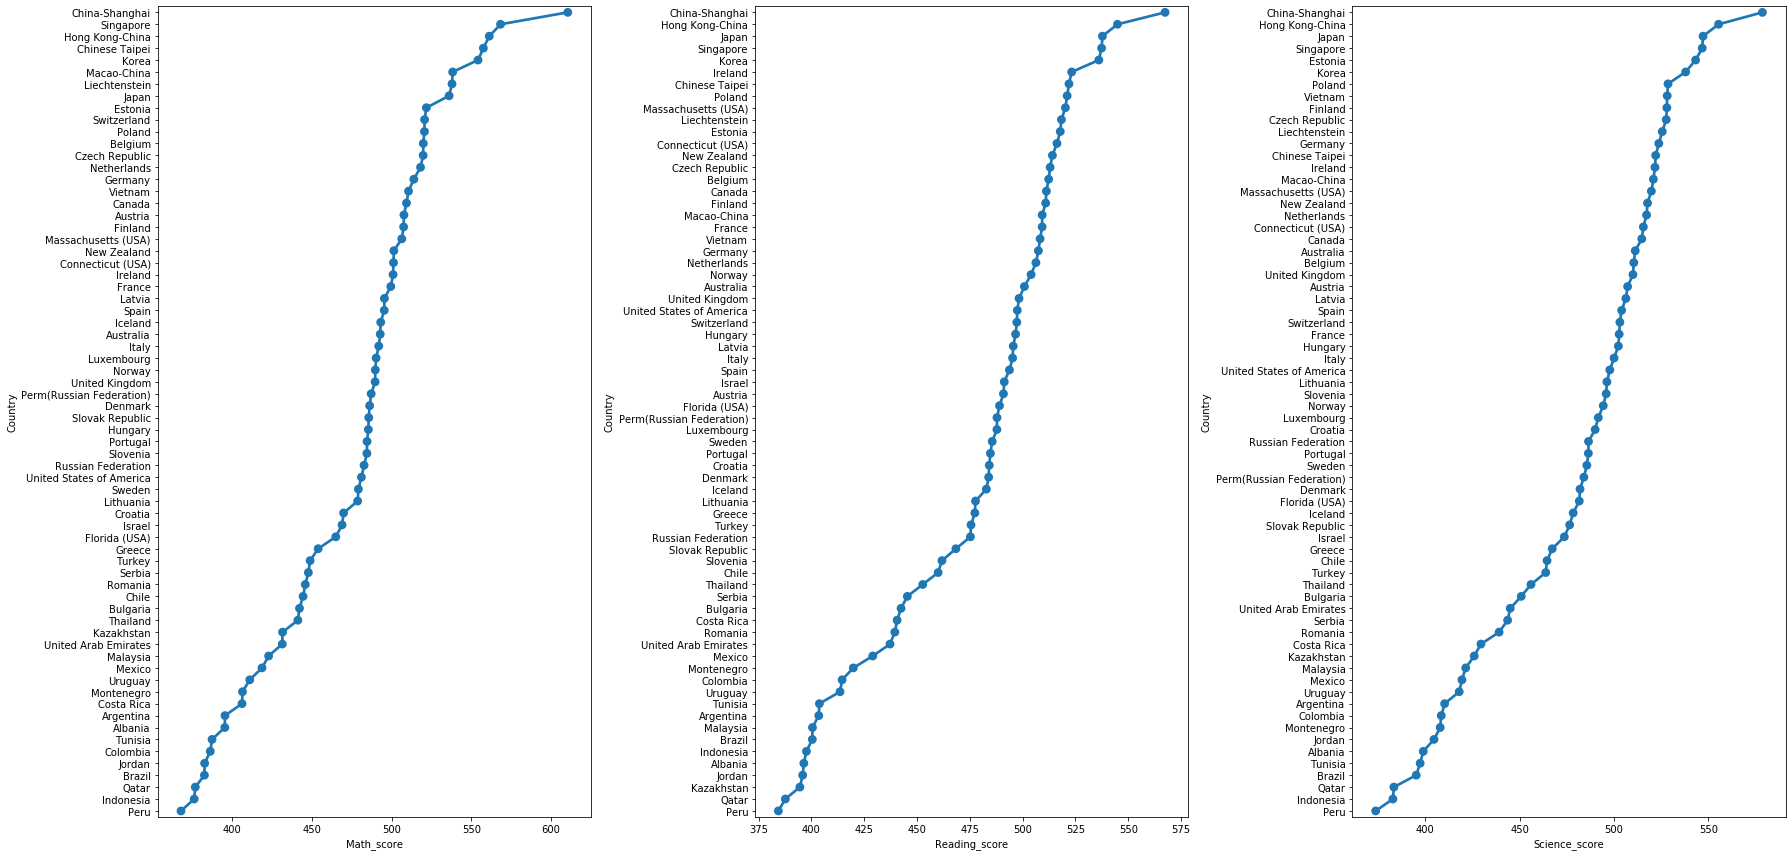

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.pointplot(data = pisa[['Country', 'Math_score']].groupby('Country', as_index=False).mean().sort_values('Math_score', ascending=False), y ='Country', x = 'Math_score') 
plt.subplot(1, 3, 2)
sb.pointplot(data = pisa[['Country', 'Reading_score']].groupby('Country', as_index=False).mean().sort_values('Reading_score', ascending=False), y ='Country', x = 'Reading_score') 
plt.subplot(1, 3, 3)
sb.pointplot(data = pisa[['Country', 'Science_score']].groupby('Country', as_index=False).mean().sort_values('Science_score', ascending=False), y ='Country', x = 'Science_score') 
axes.ylab
fig.tight_layout()

East Asian countries: China, Korea, Japan have highest mean scores in all subjects. Canada outperform USA. Florida has the worst scores among three US states presented in all plots. 
Why Florida has performed worse than others? What differ it from other states?

In [8]:
#Let's filter USA tates 
pisa_usa = pisa[((pisa.Country == 'Florida (USA)') | (pisa.Country == 'Connecticut (USA)') | (pisa.Country == 'Massachusetts (USA)'))]
#pisa[pisa.CNT == 'United States of America']
print(pisa_usa.shape)
pisa_canada = pisa[pisa.Country == 'Canada']
print(pisa_canada.shape)

(5316, 635)
(21544, 635)


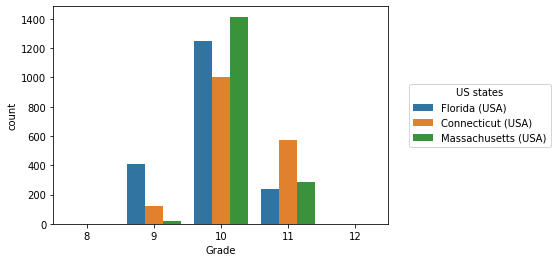

In [9]:
sb.countplot(data = pisa_usa, x = 'Grade', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'US states')

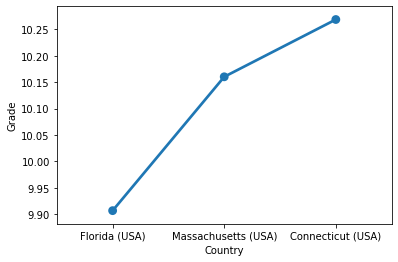

In [10]:
sb.pointplot(data = pisa_usa[['Country', 'Grade']].groupby('Country', as_index=False).mean().sort_values('Grade', ascending=True), x ='Country', y = 'Grade') ;

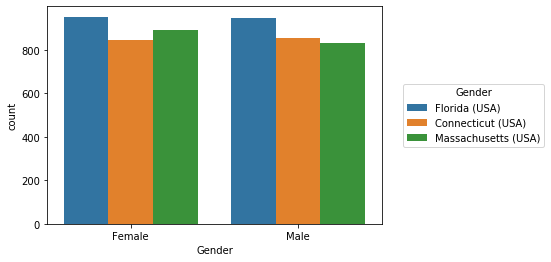

In [11]:
sb.countplot(data = pisa_usa, x = 'Gender', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Gender')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

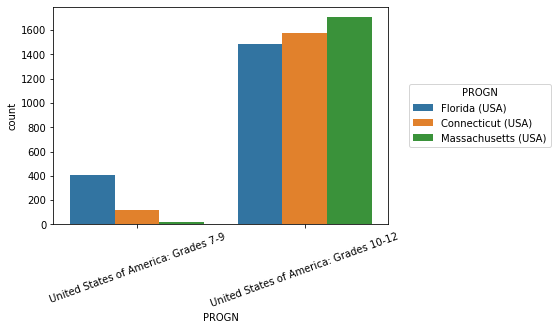

In [12]:
sb.countplot(data = pisa_usa, x = 'PROGN', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

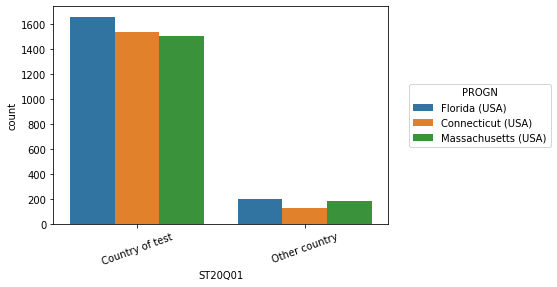

In [14]:
sb.countplot(data = pisa_usa, x = 'ST20Q01', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

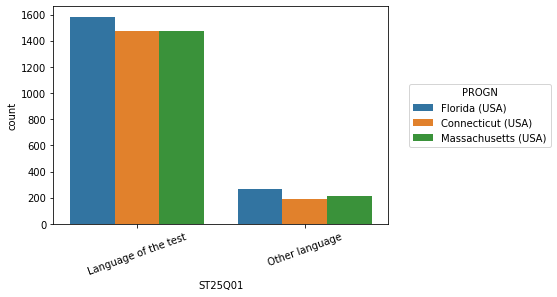

In [15]:
sb.countplot(data = pisa_usa, x = 'ST25Q01', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

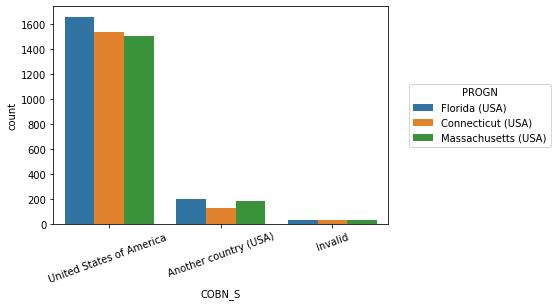

In [16]:
sb.countplot(data = pisa_usa, x = 'COBN_S', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

In [ ]:
"COGACT","Cognitive Activation in Mathematics Lessons"
"ESCS","Index of economic, social and cultural status"
"IMMIG","Immigration status"
"LANGN","Language at home (3-digit code)"
"ST29Q03","Math Interest - Look Forward to Lessons"
"ST29Q04","Math Interest - Enjoy Maths"
;"ST21Q01","Age of arrival in <country of test>" arrival age

Math Level Score points on the PISA scale
6 Above 669.3
5 From 607.0 to less than 669.3
4 From 544.7 to less than 607.0
3 From 482.4 to less than 544.7
2 From 420.1 to less than 482.4
1 From 357.8 to less than 420.1
Below level 1 Below 357.8

In [66]:
pisa.Immigration_status.fillna("Unknown", inplace = True) 
pisa.Immigration_status.unique()

array(['Native', 'Unknown', 'Second-Generation', 'First-Generation'],
      dtype=object)

In [68]:
enjoy_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree', 'Unknown']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = enjoy_order)
pisa['Enjoy_math'] = pisa['Enjoy_math'].astype(ordered_cat)

imm_order = ['Native', 'First-Generation', 'Second-Generation', 'Unknown']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = imm_order)
pisa['Immigration_status'] = pisa['Immigration_status'].astype(ordered_cat)

### What is the structure of your dataset?

> There are 485490 students in the dataset from 68 different countries with these features I chose:
Country, School_ID, Grade, Gender, Enjoy_math, Homework_hours, Socio_economic_status, Immigration_status, Language_at_home, Math_score, Reading_score, Science_score        <br>
Some variables are categorical: Grade, Gender. Some are numeric: Homework_hours, Socio_economic_status, Math_score,      Reading_score, Science_score. Variables Enjoy_math, Immigration_status are ordered categorical variables with the following levels. <br>
Enjoy_math: 'Strongly disagree', 'Disagree', 'Agree', 'Strongly agree', 'Unknown' <br>
Immigration_status: 'Native', 'First-Generation', 'Second-Generation', 'Unknown' <br>

### What is/are the main feature(s) of interest in your dataset?

> I'm very interested in finding out what features are best for predicting the math, reading and science test results.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Socio_economic_status of students will have a big effect on the scores, disadvantaged students will be underperforming. I also hope that if students enjoy subject and independent time studying (homework) they will perform better.<br>
It is interesting how immigrant status is influencing scores and if gender has influence at all.


## Univariate Exploration

> 1) distribution of the main variables: math, reading and science scores.

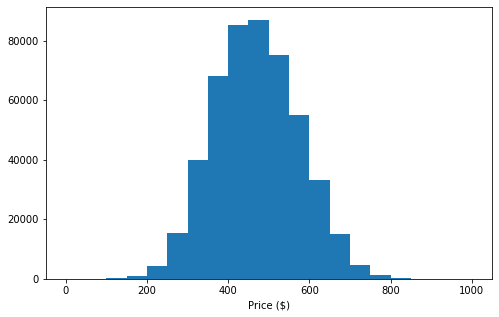

In [73]:
binsize = 50
bins = np.arange(0, pisa['Math_score'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.show()

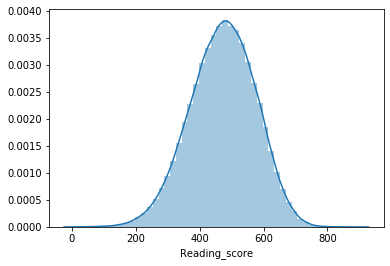

In [103]:
sb.distplot(pisa['Reading_score'], norm_hist=True, color = base_color);

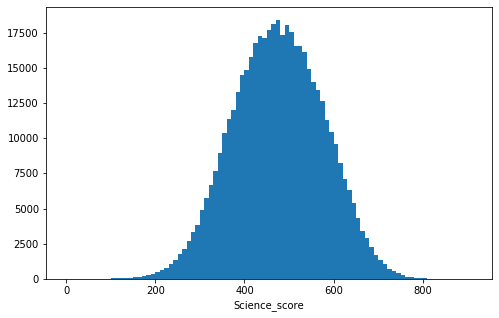

In [79]:
binsize = 10
bins = np.arange(0, pisa['Science_score'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Science_score', bins = bins)
plt.xlabel('Science_score')
plt.show()

All plots are normally distributed. I guess the PISA test is organized that way to get normally distributed scores as a result. 

>2) How are students distributed among the countries?

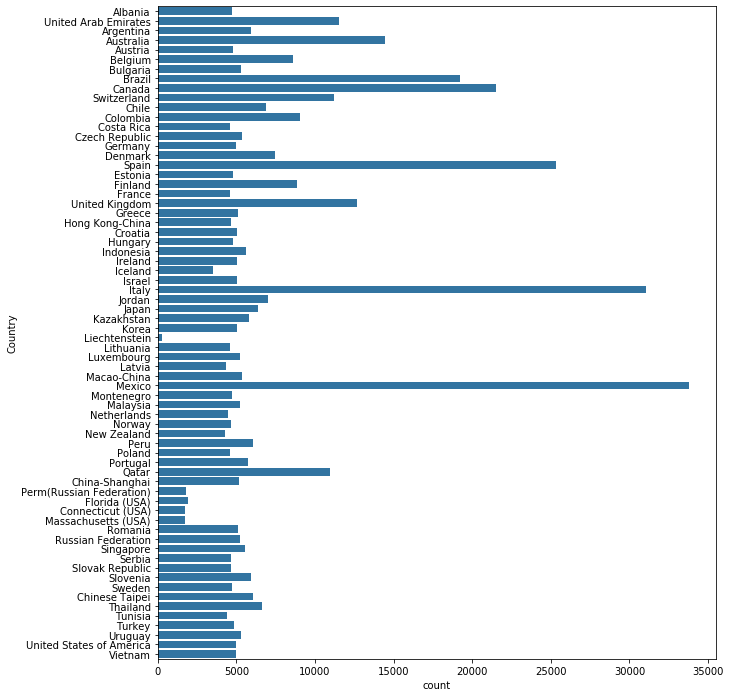

In [114]:
plt.figure(figsize = [10, 12])
sb.countplot(data=pisa, y = 'Country', color = base_color );

Most countries have arount 5000 students particiated or more. Countries with less studeant are actually subregions of other countries.
I think it would more intersting to choose two-three countries and investigate them more. Or may be choose different states of USA and compare them.

> 3) Next I want to investigate Socio_economic_status.<br>
Socio_economic_status is the PISA index of economic, social and cultural status (ESCS) created using student reports on parental occupation, the highest level of parental education, and an index of home possessions related to family wealth, home educational resources and possessions related to “classical” culture in the family home.<br>
A negative value merely indicates that the respondents answered less positively than all respondents did on average across OECD countries.

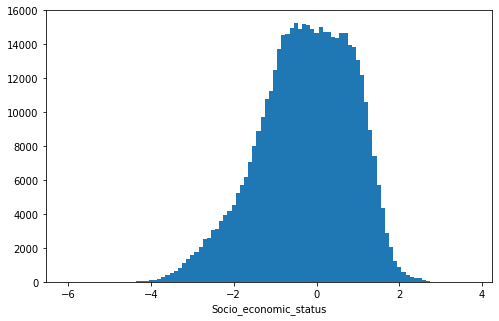

In [99]:
binsize = 0.1
bins = np.arange(pisa['Socio_economic_status'].min() - binsize, pisa['Socio_economic_status'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Socio_economic_status', bins = bins)#density=True)
plt.xlabel('Socio_economic_status')
plt.show()

Socio_economic_status is slightly skewed left.

> 4) Grade distibution

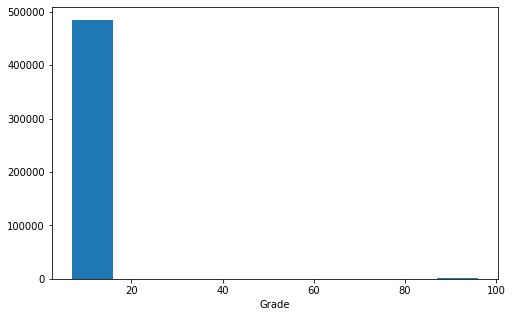

In [102]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade')
plt.xlabel('Grade')
plt.show()

As I noticed earlier there is an outlier. 

In [144]:
print(pisa[pisa['Grade']>14].Grade.value_counts())
#Percent of student body
100* pisa[pisa['Grade']>14].Country.value_counts()/pisa.Country.count()

96    45
Name: Grade, dtype: int64


Lithuania    0.009269
Name: Country, dtype: float64

PISA-2012-technical-report-final.pdf file indicates that values for Grade column should be from 7 to 14. <br>
I think 96 means that the grade is unknown. In all countries such values are 1% or less.<br>
It would be safe to fill them with mean value.

In [148]:
pisa[((pisa['Grade']<=14) & ((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')|(pisa['Country']=='Latvia')))].groupby('Country')['Grade'].mean().round()

Country
Belgium      10.0
Latvia        9.0
Lithuania     9.0
Portugal      9.0
Vietnam      10.0
Name: Grade, dtype: float64

In [149]:
pisa.loc[((pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')) & (pisa.Grade == 96), ['Grade']] = 10
pisa.loc[((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Latvia')) & (pisa.Grade == 96), ['Grade']] = 9

In [151]:
#Test
print(pisa[pisa['Grade']>20].shape)
pisa[pisa['Country']=='Lithuania'].Grade.value_counts()

(0, 12)


9     3806
10     525
8      278
7        7
11       2
Name: Grade, dtype: int64

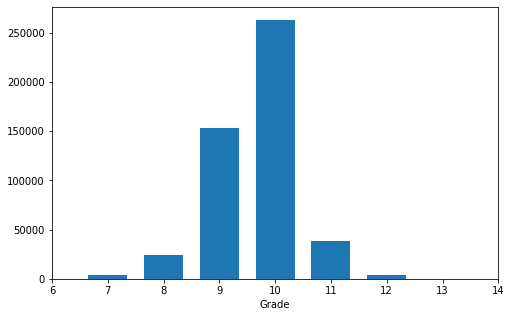

In [162]:
bin_edges = np.arange(6.5, 13.5, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(6, 15, 1))
plt.xlabel('Grade')
plt.show()

Looks like most 15y.o. around all countries attend 10th grade.

> 5 Gender distribution 

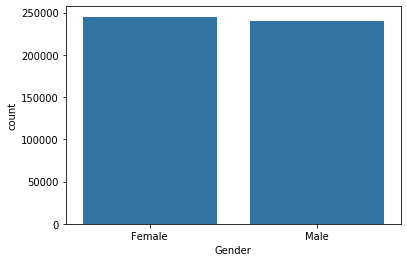

In [166]:
sb.countplot(data = pisa, x = 'Gender', color=base_color)

> 6) Enjoy_math attitude distribution <br>
7) Immigration_status distribution

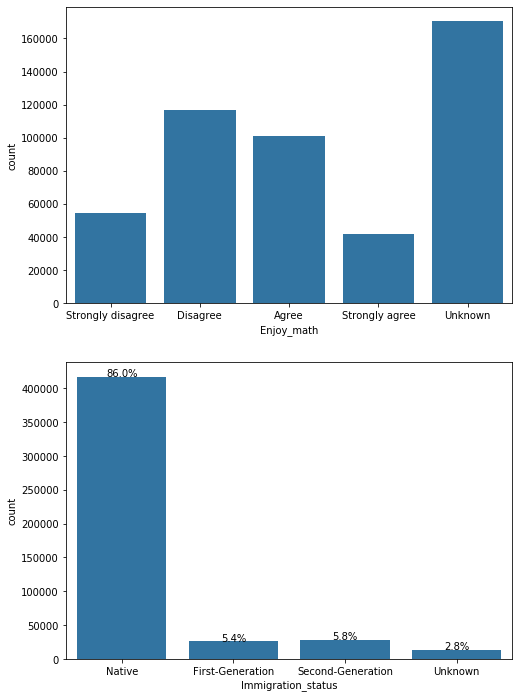

In [200]:
fig, ax = plt.subplots(nrows=2, figsize = [8,12]);
sb.countplot(data = pisa, x = 'Enjoy_math', color=base_color, ax = ax[0]);
sb.countplot(data = pisa, x = 'Immigration_status', color=base_color, ax = ax[1]);
n_points = pisa.shape[0]
cat_counts = pisa['Immigration_status'].value_counts()
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)    
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

plt.show();

I know that there are countries like USA or Canada which have larger percent of immigrant students, but averall 86% of population are native students

> 8) Time spent on homework at home

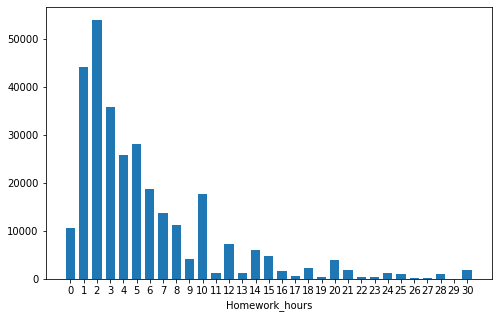

In [182]:
bin_edges = np.arange(-0.5, 31, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Homework_hours', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 31, 1))
plt.xlabel('Homework_hours')
plt.show()

Most students spend on homework 10 hours a week or less.<br>
But there are some really hard working students. It's interesting if it would correlate in test scores.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All test scores are normally distributed. <br>
Most countries have arount 5000 students particiated or more. Countries with less studeant are actually subregions of other countries. I think it would more intersting to choose two-three countries and investigate them more. Or may be choose different states of USA and compare them.<br>
Socio_economic_status is slightly skewed left.<br>
86% of student are native students, it's interesting how this number would differ for USA and Canada.<br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Grade variable had an outlier, some students were 96th grade. After investigation I learnt that this is an error or otherwise specially put number when grade was unknown. Such errors were 1% or less of all students in 5 different countries. I decided to substitute then with mean grade for the country.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## References

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.read_csv.html <br>
https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf <br>
https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf<br>
https://stackoverflow.com/questions/41659188/how-to-adjust-subplot-size-in-seaborn <br>
